In [1]:
%%capture
# DO NOT EDIT THIS NOTEBOOK
# It generates a report to verify your submission
import logging, sys, os
logging.disable(sys.maxsize)
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
import solution
import time
start_verify = time.time()
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10,3)

In [2]:
%matplotlib inline
import os
import pickle
import pandas as pd
import numpy as np
import pydot
from tensorflow.keras.utils import plot_model
from IPython.display import Image
import inspect
from IPython.core import page
page.page = print

grades = []

def shout(text, verbose=1):
    """ Prints text in red. Just for fun.
    """
    if verbose>0:
        print('\033[91m'+text+'\x1b[0m')
        
def printSource(obj):
    print(''.join(str(x) for x in inspect.getsourcelines(obj)[0]))
        
# Helper function to extract min/max from the learning curves
def minMax(x):
    return pd.Series(index=['min','max'],data=[x.min(),x.max()])

def print_answer(ans):
    output = ""
    for line in ans.splitlines()[1:]:
        output += line.strip() + " "
    output += "(length: "+str(len(output))+")\n"
    print(output)
        
def run_evaluation(name, model_builder, data, base_dir, target_dir, train=True, 
                   generator=False, epochs=3, batch_size=32, steps_per_epoch=60, 
                   verbose=1, print_model=True, **kwargs):
    """ Trains and evaluates the given model on the predefined train and test splits,
    stores the trained model and learning curves. Also prints out a summary of the 
    model and plots the learning curves.
    Keyword arguments:
    name -- the name of the model to be stored, e.g. 'question_1_1.h5'
    model_builder -- function that returns an (untrained) model. The model must 
                     have a 'fit' function that follows the Keras API. It can wrap
                     a non-Keras model as long as the 'fit' function takes the 
                     same attributes and returns the learning curves (history).
                     It also must have a 'summary' function that prints out a 
                     model summary, and a 'save' function that saves the model 
                     to disk. 
    data -- data split for evaluation. A tuple of either:
            * Numpy arrays (X_train, X_val, y_train, y_val)
            * A data generator and validation data (generator, X_val, y_val)
    base_dir -- the directory to save or read models to/from
    train -- whether or not the data should be trained. If False, the trained model
             will be loaded from disk.
    generator -- whether the data in given as a generator or not
    epochs -- the number of epochs to train for
    batch_size -- the batch size to train with
    steps_per_epoch -- steps per epoch, in case a generator is used (ignored otherwise)
    verbose -- verbosity level, 0: silent, 1: minimal,...
    kwargs -- keyword arguments that should be passed to model_builder.
              Not required, but may help you to adjust its behavior
    """
    model = model_builder(**kwargs)
    if not model:
        shout("No model is returned by the model_builder")
        grades.append("0")
        return
    if not hasattr(model, 'fit'):
        shout("Model is not built correctly")
        return
    learning_curves = {}
    if train and not stop_training: # Train anew
        shout("Model not trained? Skipping.", verbose)
    else: # Load from file
        model = solution.load_model_from_file(base_dir, name)
        if not model:
            shout("Model not found")
            return
        learning_curves = None
        try:
            learning_curves = pickle.load(open(os.path.join(base_dir, name+'.p'), "rb"))
        except FileNotFoundError:
            shout("Learning curves not found")
            return
    # Report
    lc = pd.DataFrame(learning_curves)
    print("Max val score: {:.2f}%".format(lc.iloc[:,3].max()*100))
    grades.append("{:.2f}".format(lc.iloc[:,3].max()*100))
    lc.plot(lw=2,style=['b:','r:','b-','r-']);
    plt.xlabel('epochs');
    plt.show()
    
    if print_model:
        print(model.summary())
    plot_model(model, to_file=os.path.join(target_dir,name+'.png'), show_shapes=True, show_layer_names=False)
        
import pprint
pp = pprint.PrettyPrinter(indent=4)

### Web Information Retrieval and Data Mining - Assignment 3

In [3]:
grades.append(solution.target_dir.split(os.sep)[-1])
grades.append(solution.your_name)
print("Student: {0} ({1})".format(solution.your_name,solution.student_id))

Student: Rensen, Jolan (0946444)


#### Answer 1.1, Baseline (4p)
- Dense network, at least 3 layers, shaped like a pyramid
    - Last layer: 10 nodes, sigmoid. 
    - Loss: categorical cross-entropy. Metric: accuracy
- No preprocessing, regularization. Get at least 70% accuracy.
- Explain design decisions. Discuss performance.
    - Does it overfit (large/growing gap between loss and val_loss)?

First I reshaped the model to make it 1-dimensional. Next I added some Dense layers and found that the last one needed to have 10 nodes due to the input data. Following the pyramid shape I experimented with sigmoid, relu and softmax activation functions and found this setup to be the best performing, reaching over 70% accuracy (with 12 epochs). I used the compile function from Lab 6.  (length: 388)



Max val score: 72.45%


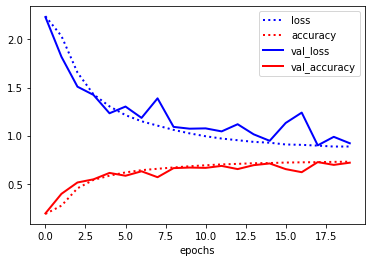

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_1 (Reshape)          (None, 3072)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 160)               491680    
_________________________________________________________________
dense_6 (Dense)              (None, 80)                12880     
_________________________________________________________________
dense_7 (Dense)              (None, 40)                3240      
_________________________________________________________________
dense_8 (Dense)              (None, 20)                820       
_________________________________________________________________
dense_9 (Dense)              (None, 10)                210       
Total params: 508,830
Trainable params: 508,830
Non-trainable params: 0
________________________________________________

def build_model_1_1() -> models.Model:
    model: models.Sequential = models.Sequential([
            layers.Reshape(target_shape=(3072,), input_shape=(32,32,3)),
            layers.Dense(units=160, activation=activations.relu),
            layers.Dense(units=80, activation=activations.relu),
            layers.Dense(units=40, activation=activations.relu),
            layers.Dense(units=20, activation=activations.sigmoid),
            layers.Dense(units=10, activation=activations.sigmoid),                          
    ])
   
    model.compile(
        optimizer=optimizers.RMSprop(),
        loss=losses.CategoricalCrossentropy(),
        metrics=[metrics.Accuracy().name]
    )
    
    return model



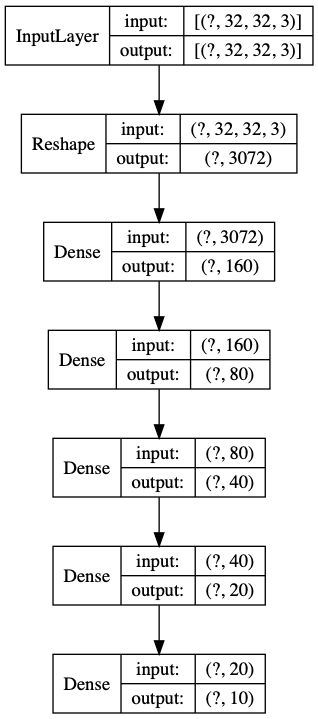

In [4]:
print_answer(solution.answer_q_1_1)
run_evaluation("model_1_1", solution.build_model_1_1, solution.evaluation_split, solution.base_dir, 
               solution.target_dir, train=False)
%psource solution.build_model_1_1
if os.path.exists(os.path.join(solution.target_dir,'model_1_1.png')):
    display(Image(os.path.join(solution.target_dir,'model_1_1.png'), width=200))

#### Answer 1.2, Preprocess (2p)
- Convert images to greyscale, other preprocessing optional.
    - Input shape should be (32,32,1)
- Explain design decisions. Is it better? Why (not)? 
    - Color information is likely not so useful for classification. Greyscale makes the network smaller, less parameters to learn, less likely to overfit.

The result of the grayscale version is higher than the one before. This might be because the network can now ignore color and just focus on shapes, as colors do not influence the resulting digit. It reaches 70% accuracy already in 10 epochs.  (length: 243)



Max val score: 74.56%


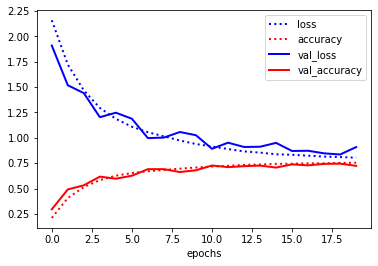

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_2 (Reshape)          (None, 1024)              0         
_________________________________________________________________
dense_10 (Dense)             (None, 160)               164000    
_________________________________________________________________
dense_11 (Dense)             (None, 80)                12880     
_________________________________________________________________
dense_12 (Dense)             (None, 40)                3240      
_________________________________________________________________
dense_13 (Dense)             (None, 20)                820       
_________________________________________________________________
dense_14 (Dense)             (None, 10)                210       
Total params: 181,150
Trainable params: 181,150
Non-trainable params: 0
________________________________________________

def build_model_1_2() -> models.Model:
    model: models.Sequential = models.Sequential([
            layers.Reshape(target_shape=(1024,), input_shape=(32,32,1)),
            layers.Dense(units=160, activation=activations.relu),
            layers.Dense(units=80, activation=activations.relu),
            layers.Dense(units=40, activation=activations.relu),
            layers.Dense(units=20, activation=activations.sigmoid),
            layers.Dense(units=10, activation=activations.sigmoid),                       
    ])
    
    model.compile(
        optimizer=optimizers.RMSprop(),
        loss=losses.CategoricalCrossentropy(),
        metrics=[metrics.Accuracy().name]
    )
    
    return model



In [5]:
print_answer(solution.answer_q_1_2)
run_evaluation("model_1_2", solution.build_model_1_2, solution.evaluation_split, solution.base_dir, 
               solution.target_dir, train=False)
%psource solution.build_model_1_2

#### Answer 1.3, Tune (4p)
- Regularize the model. What works best? 
    - Should consider batch normalization, dropout, l1/l2 regularization (or Nesterov)
- Tune other hyperparameters (e.g. learning rate, batch size,...) as you see fit.
    - At least consider tuning learning rate, ideally also momentum, decay, other optimizers 
- Explain your findings and final design decisions. Discuss the results.
    - Should be better, at least it shouldn't overfit

Interestingly, lowering the learning rate compared to the default (0.001), makes the accuracy improve for each epoch. Decreasing the batch_size increases the calculation time per epoch, but not necessarily improves the accuracy. Increasing the batch_size however does allow to easily go through 50 epochs and reach 81%. There is some slight overfitting regarding the loss however.  (length: 382)



Max val score: 79.76%


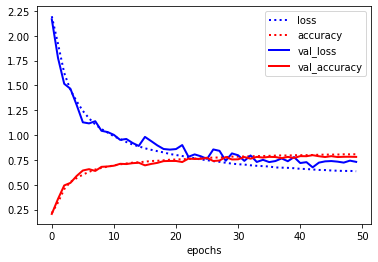

def build_model_1_3() -> models.Model:
    model: models.Sequential = models.Sequential([
            layers.Reshape(target_shape=(1024,), input_shape=(32,32,1)),
            layers.Dense(units=160, activation=activations.relu, bias_regularizer=regularizers.l2(.001)),
            layers.Dense(units=80, activation=activations.relu, bias_regularizer=regularizers.l2(.001)),
            layers.Dense(units=40, activation=activations.relu, bias_regularizer=regularizers.l2(.001)),
            layers.Dense(units=20, activation=activations.sigmoid),
            layers.Dense(units=10, activation=activations.sigmoid),                           
    ])
    
    model.compile(
        optimizer=optimizers.RMSprop(learning_rate=.001),
        loss=losses.CategoricalCrossentropy(),
        metrics=[metrics.Accuracy().name]
    )
    
    
    return model



In [6]:
print_answer(solution.answer_q_1_3)
run_evaluation("model_1_3", solution.build_model_1_3, solution.evaluation_split, solution.base_dir, 
               solution.target_dir, train=False, print_model=False)
%psource solution.build_model_1_3

#### Answer 2.1, ConvNet (7p)
- Build a sequential ConvNet, get at least 90% accuracy.
    - Conv2D layers, input shape (32,32,1)
    - Consider using blocks of Conv2D layers with maxpooling in between
    - Use zero-padding in Conv2D layers because the images are small
    - At least one dense hidden layer and dense output layer (sigmoid)
    - Consider adding batch normalization, dropout
    - Consider small dropout rates in beginning, larger dropout rates later in network
    - Consider other optimizers and tuning learning rate, momentum,...
- Explain what you did and why (800 chars). Is it working well?
    - Should be quite elaborate and sensible

I noticed a lot of overfitting using the first example from Lab 6, so I followed the rest of the lab, adding VGG-like additions to the model as well as regularization, dropout and batch normalization.  (length: 202)



Max val score: 94.43%


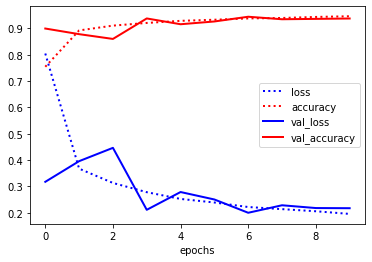

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 32, 32, 32)        320       
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 16, 16, 64)      

def build_model_2_1() -> models.Model:

  model: models.Sequential = models.Sequential([
      layers.Conv2D(filters=32, kernel_size=(3, 3), activation=activations.relu, padding="same", input_shape=(32, 32, 1)),
      layers.BatchNormalization(),
      layers.Conv2D(filters=32, kernel_size=(3, 3), activation=activations.relu, padding="same"),
      layers.BatchNormalization(),
      layers.MaxPooling2D(pool_size=(2, 2)),

      layers.Dropout(rate=.2),
      layers.Conv2D(filters=64, kernel_size=(3, 3), activation=activations.relu, padding="same"),
      layers.BatchNormalization(),
      layers.Conv2D(filters=64, kernel_size=(3, 3), activation=activations.relu, padding="same"),
      layers.BatchNormalization(),
      layers.MaxPooling2D(pool_size=(2, 2)),

      layers.Dropout(rate=.3),
      layers.Conv2D(filters=128, kernel_size=(3, 3), activation=activations.relu, padding="same"),
      layers.BatchNormalization(),
      layers.Conv2D(filters=128, kernel_size=(3, 3), activation=ac

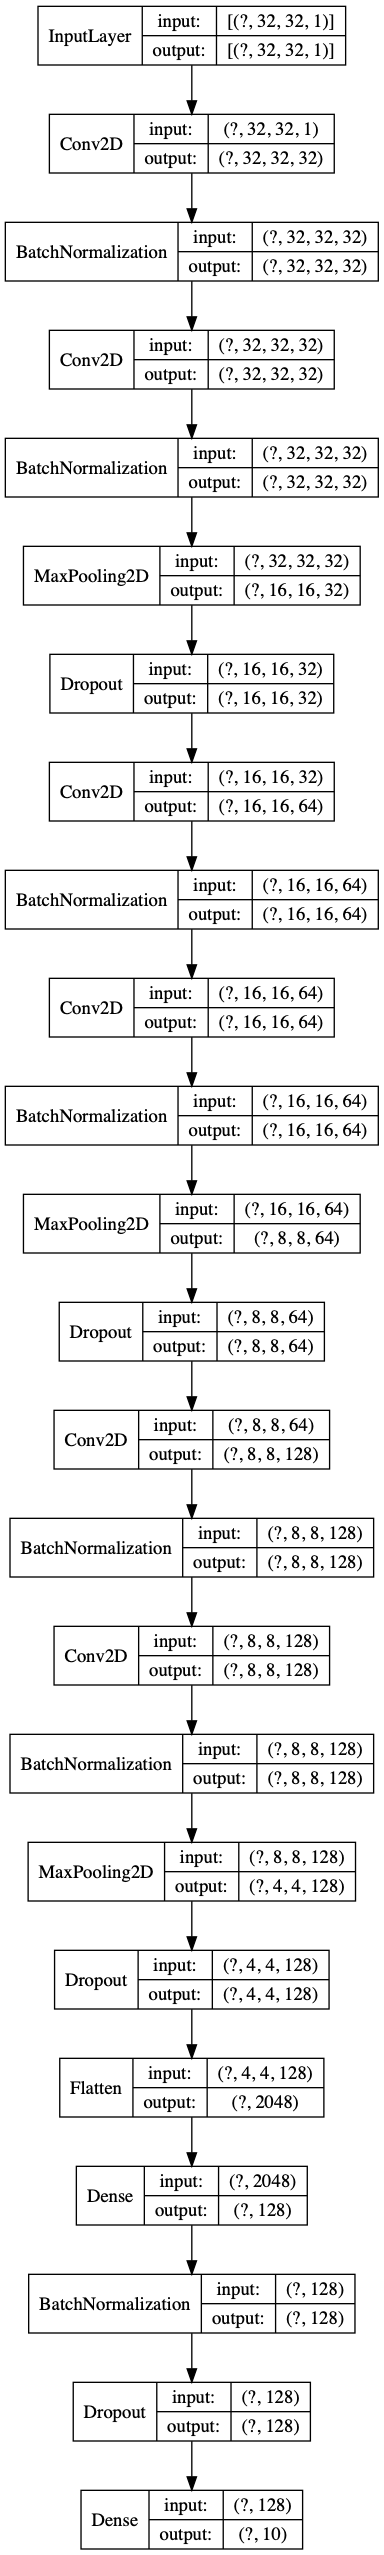

In [7]:
print_answer(solution.answer_q_2_1)
run_evaluation("model_2_1", solution.build_model_2_1, solution.evaluation_split, solution.base_dir, 
               solution.target_dir, train=False)
%psource solution.build_model_2_1
if os.path.exists(os.path.join(solution.target_dir,'model_2_1.png')):
    display(Image(os.path.join(solution.target_dir,'model_2_1.png'), width=200))

#### Answer 2.2, Data Augmentation (3p)
- Augment the preprocessed training data.
    - Use small variations (small shifts up-down, left-right) of flips becasue the images are small
    - Large shifts and rotations distort the image too much
- Explain what you did and why. Discuss the performance of the model.

The effects of width shift and height shift are comparable. Combined, however, the effects are that the result gets much worse. The same holds for horizontal- vs vertical flips, except that combining the two only decreases the accuracy by a third (compared to having just one of the two active). Shearing has almost no negative effect on the accuracy, however there does appear to be overfitting. Zooming up to 0.5 seems doable, however, increasing the zoom range worsens the results. Rotations at 20 degrees are very well handled, yielding almost no negative effect at 20 degrees, however slightly more at higher ones. Rescaling does not affect the accuracy at all, but it makes the model overfit enourmously, just like no augmentation of the data does. Shearing, rotating and zooming work fine together, decreasing the amount of overfitting a lot.  (length: 851)



Max val score: 83.26%


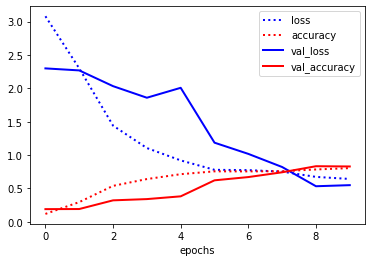


train_data_generator: ImageDataGenerator = ImageDataGenerator(  # 75.4%
    # width_shift_range=.5,  # 49.1%
    # height_shift_range=.5,  # 50.5%
    # horizontal_flip=True,  # 61.4%
    # vertical_flip=True,
    shear_range=10,
    zoom_range=.2,  # 59%
    rotation_range=10,
    # rescale=1  # overfitting
)


In [8]:
print_answer(solution.answer_q_2_2)
run_evaluation("model_2_2", solution.build_model_2_1, solution.augmented_split, solution.base_dir, 
               solution.target_dir, train=False, print_model=False)
print(solution.dg_code)

#### Answer 3.1, Misclassifications (2p)
- Report the test score (on the held-out test data)
    - Should be similar to score of previous model
- Plot confusion matrix, discuss which classes are often confused.
    - class 1 and 2 are most often confused
- Visualize the misclassifications in more depth by focusing on a single class
- Analyse which kinds of mistakes are made for that class.
    - Should contain some insight (e.g. misclassifications when the numbers are curly or noisy)

From the confusion matrix can be seen that 1 is predicted often when that is not the true value. This happens for all numbers, however, it happens the most for 7, 3 and 4. Aside from this, predicting a 6 when it is actually a 8, or predicting a 3 when it's actually a 5 (or vice versa) also seems to happen a lot. In the case for 1, by plotting some misclassifications, it can be seen that often 1 does appear in the same picture, however not in the center, so the actual label is different. Sometimes the area between two numbers is also seen as a 1, as well als just overall blurry pictures with a vague line in them. The confusion between 3 and 5 often seems to originate when the top half of the 3 or 5 is smaller than the bottom half.  (length: 741)

Test score: 0.83%


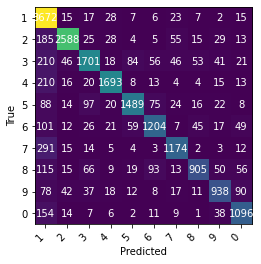

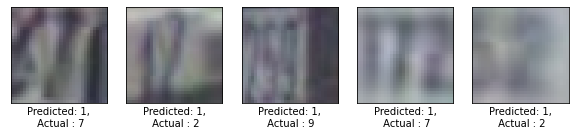

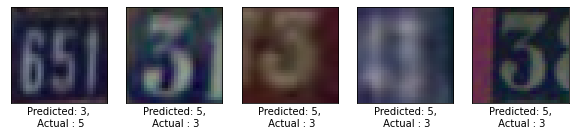

In [9]:
print_answer(solution.answer_q_3_1)
if hasattr(solution, 'test_accuracy_3_1'):
    try:
        print("Test score: {:.2f}%".format(solution.test_accuracy_3_1))
    except TypeError:
        print("Test score:",solution.test_accuracy_3_1)
else:
    print("Test score NOT FOUND: test_accuracy_3_1 missing")
try:
    solution.plot_confusion_matrix()
except:
    print("ERROR, could not build confusion matrix. Please check original report")
try:
    solution.plot_misclassifications()
except:
    print("ERROR, could not build misclassification plot. Please check original report")

#### Answer 3.2, Activations (4p)
- Retrieve and visualize the activations for one example
- For every filter for different convolutional layers (at different depths in the network).
- Give an explanation. Is your model indeed learning something useful?
    - Should detect edges etc in first layers, higher-order object (e.g. interesting regions) in deeper layers.

While it gets harder to see from filter 11 onwards, it is clear that the model is focussing on the correct shape of the number 8 while discarding the number 5 that is not centered. It's curious to see that around filter 7 in some cases the colors are inverted, meaning that while at first the number 8 was colored in, now it's the background that is colored in.  (length: 363)



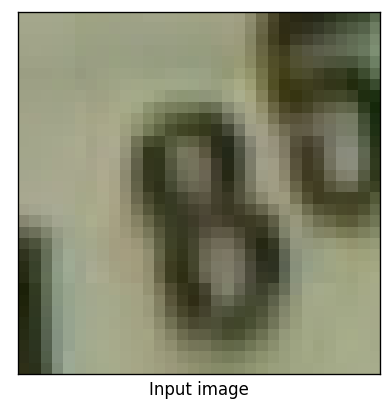

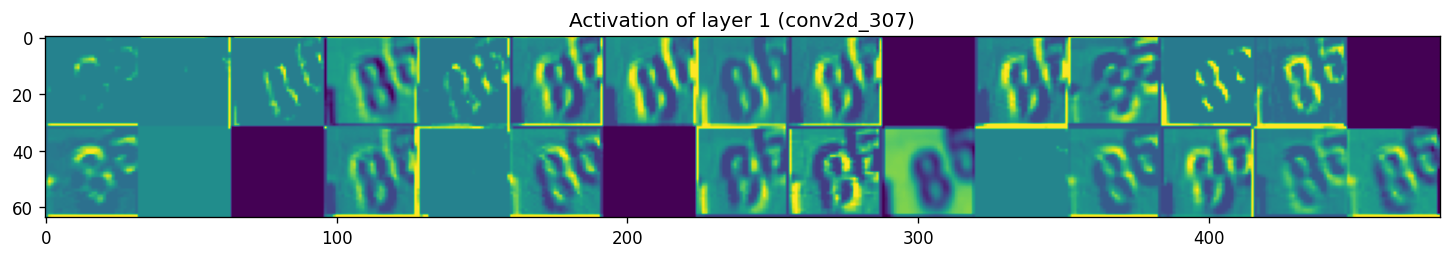

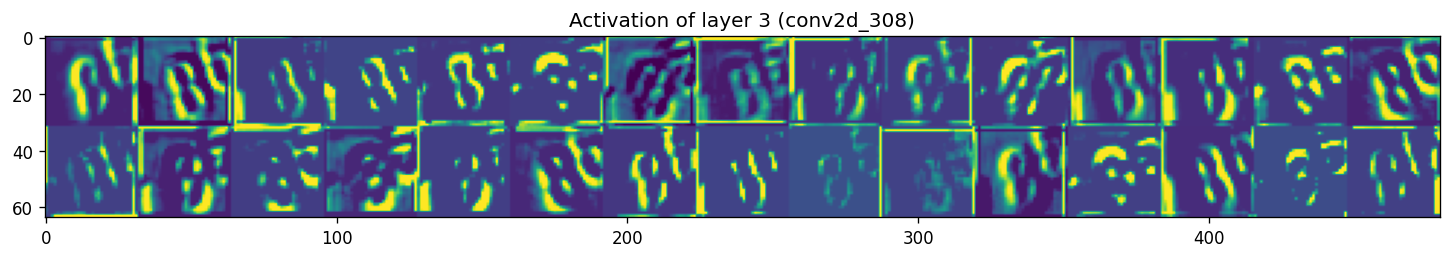

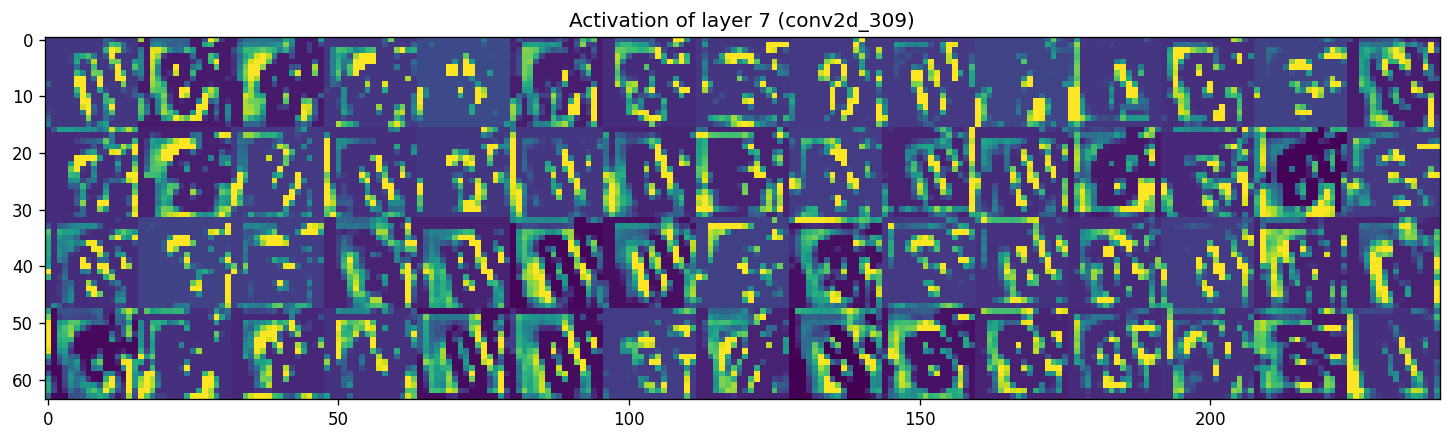

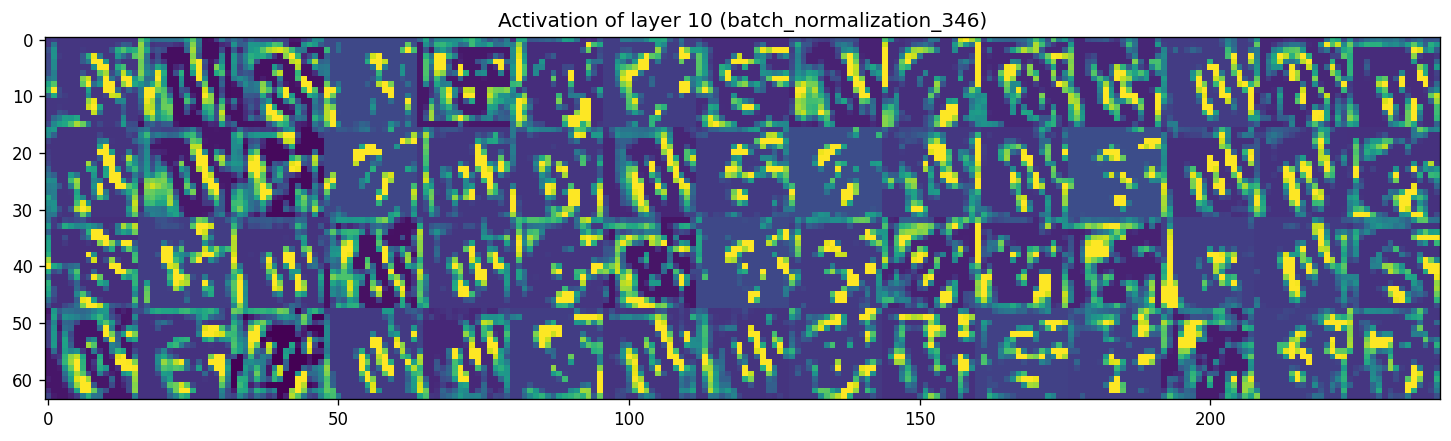

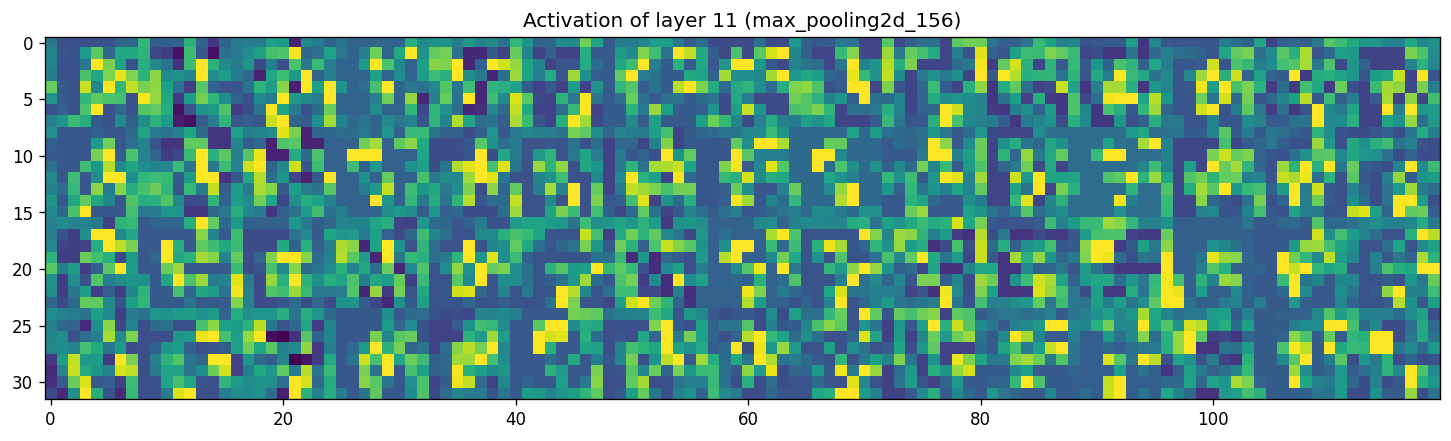

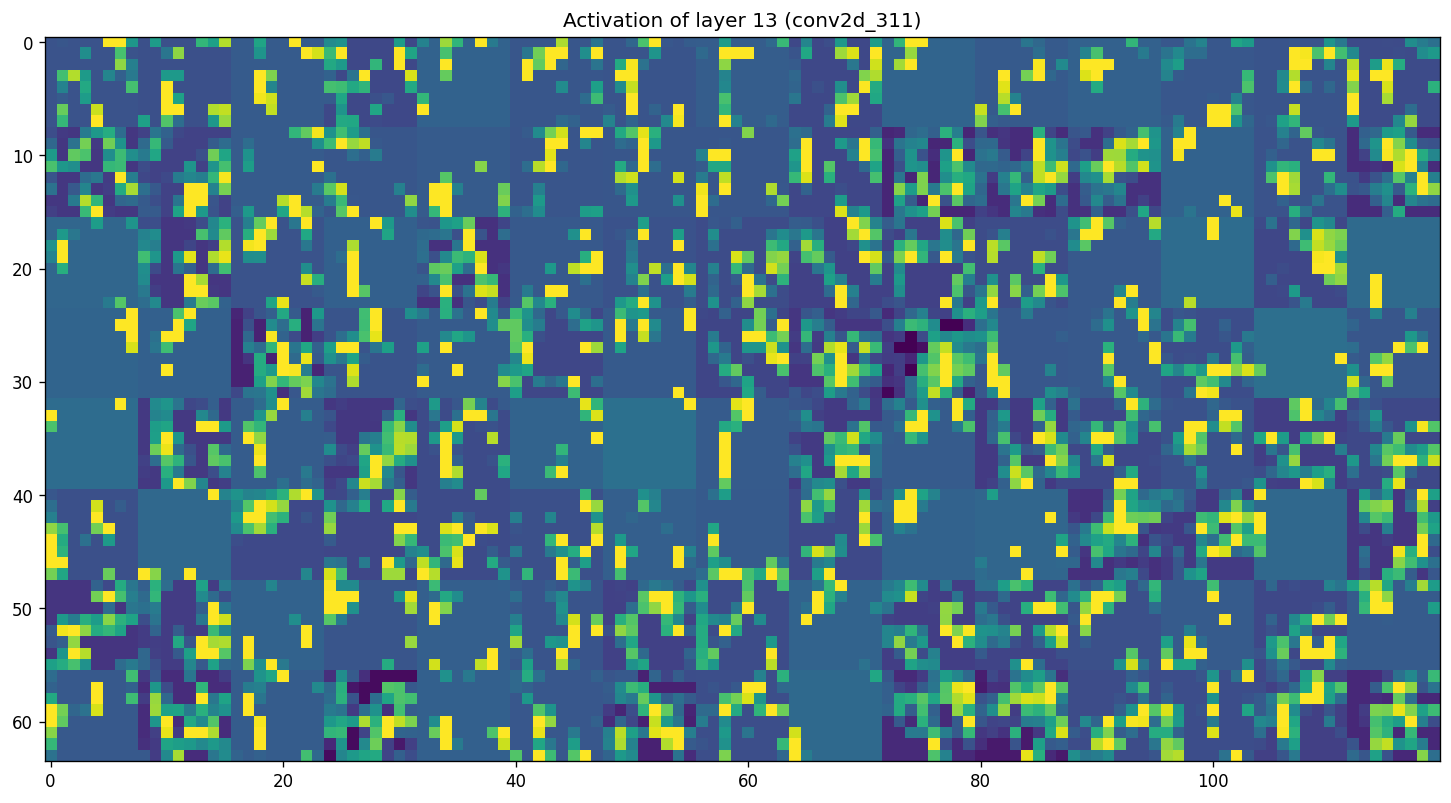

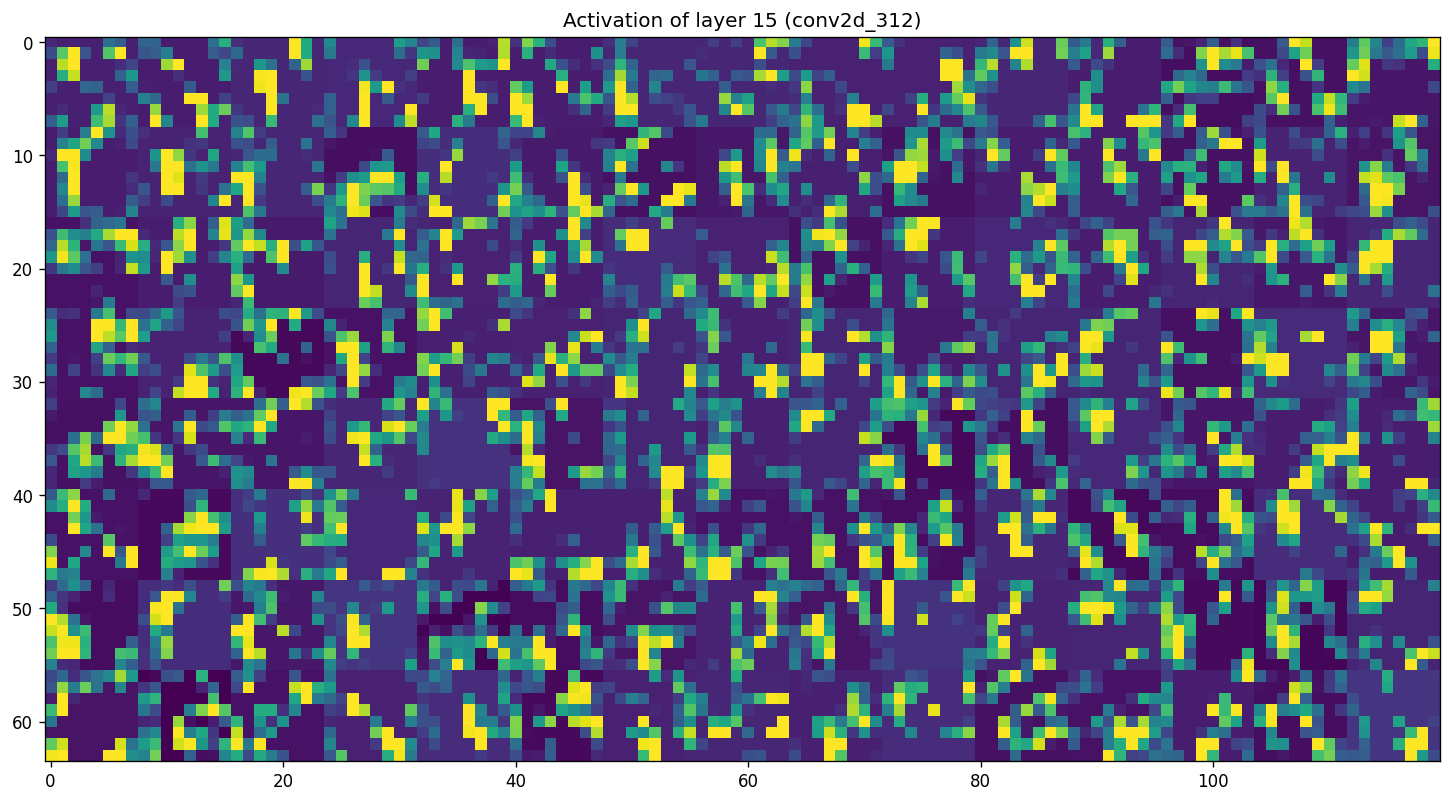

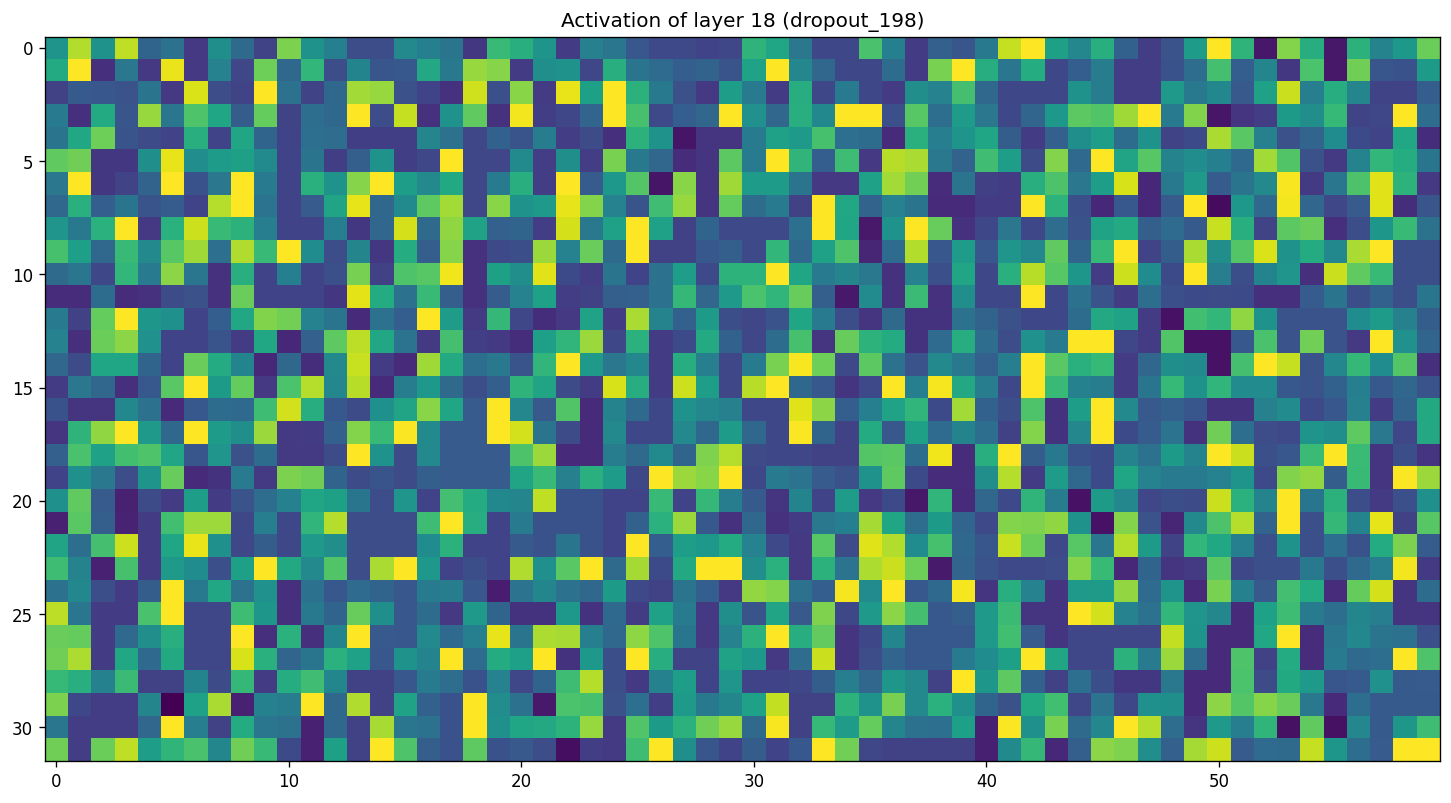

In [10]:
print_answer(solution.answer_q_3_2)
try:
    solution.plot_activations()
except:
    print("ERROR, could not build activation plot. Please check original report")

#### Answer 3.3, Class activation map (4p)
- Show a class activation map for your last convolutional layer
- Superimpose the activation map over the image, or plot side by side
    - Should make sense, detect interesting regions to classify the number

Predicted: 8


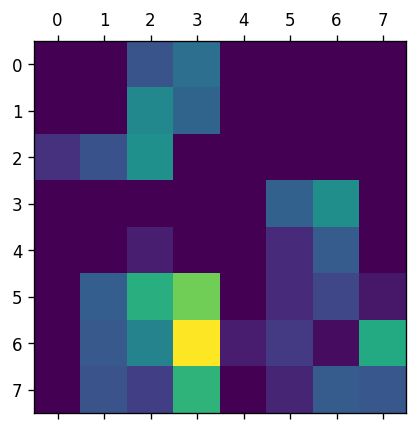

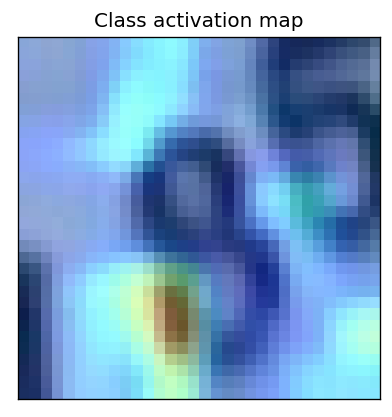

def plot_activation_map():
  last_conv_layer: layers.Layer = model.get_layer('conv2d_312')
  model_output: tf.Tensor = model.output[:, 9]
  grads: tf.Tensor = K.gradients(model_output, last_conv_layer.output)[0]
  pooled_grads: tf.Tensor = K.mean(grads, axis=(0, 1, 2))
  iterate: GraphExecutionFunction = K.function([model.input], [pooled_grads, last_conv_layer.output[0]])

  pooled_grads_value: ndarray; conv_layer_output_value: ndarray
  pooled_grads_value, conv_layer_output_value = iterate([img_tensor])

  for i in range(128):
      conv_layer_output_value[:, :, i] *= pooled_grads_value[i]

  preds: ndarray = model.predict(img_tensor)
  print('Predicted:', (np.argmax(preds) + 1) % 10)

  heatmap: ndarray = np.mean(conv_layer_output_value, axis=-1)
  heatmap = np.maximum(heatmap, 0)
  heatmap /= np.max(heatmap)
  plt.matshow(heatmap)
  plt.show()

  x: ndarray = X_test[0]

  heatmap = cv2.resize(heatmap, (x.shape[1], x.shape[0]))
  heatmap = np.uint8(255 * heatmap)
  heatmap = cv2.appl

In [11]:
try:
    solution.plot_3_3()
except:
    print("ERROR, could not build class activation plot. Please check original report")
if hasattr(solution, 'plot_activation_map'):
    %psource solution.plot_activation_map
else:
    %psource solution.plot_3_3

#### Answer 4.1, Fast feature extraction (5p)
- Import the VGG16 model, pretrained on ImageNet
- Freeze convolutional base, adds a dense layer
- Consider unfreezing the last few convolutional layers and evaluate whether that works better
    - Check if they do. It is very likely to help.
- Discuss the observed performance
    - Should get around 80% accuracy

It takes a very long time to train the model having its convolutional base frozen with an accuracy that only slowly gets better, however not much highter than 55%. Unfreezing the last (or last two) convolutional blocks of the convolutional base doesn't do anything notable.   (length: 276)



Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 32, 32, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 32, 32, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 16, 16, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 16, 16, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 16, 16, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 8, 8, 128)         0     

Max val score: 54.31%


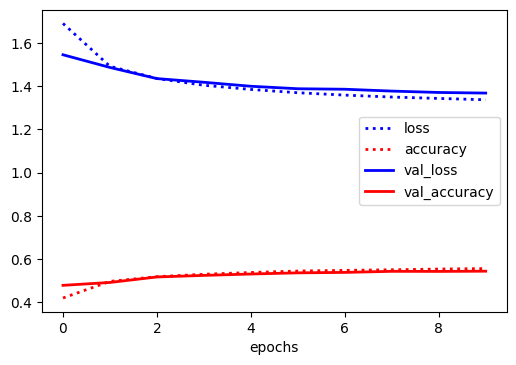

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 1, 1, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 512)               0         
_________________________________________________________________
dense (Dense)                (None, 10)                5130      
Total params: 14,719,818
Trainable params: 12,984,330
Non-trainable params: 1,735,488
_________________________________________________________________
None
def build_model_4_1() -> models.Model:
  conv_base: models.Model = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

  conv_base.summary()

  model: models.Sequential = models.Sequential([
      conv_base,
      layers.Flatten(),
      layers.Dense(units=10, activation=activations.sigmoid),                  
  ])

  conv_base.trainable = 

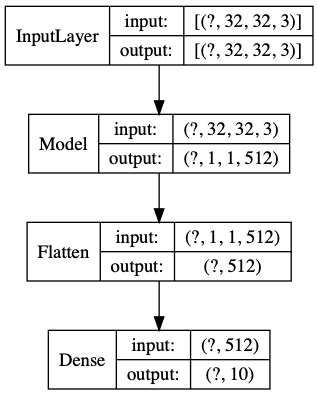

In [12]:
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 100

print_answer(solution.answer_q_4_1)
run_evaluation("model_4_1", solution.build_model_4_1, solution.evaluation_split, solution.base_dir, 
               solution.target_dir, train=False)
%psource solution.build_model_4_1
if os.path.exists(os.path.join(solution.target_dir,'model_4_1.png')):
    display(Image(os.path.join(solution.target_dir,'model_4_1.png'), width=200))
#solution.build_model_4_1().layers[0].summary()

#### Answer 4.2, Embeddings (5p)
- Generate embeddings with the trained convolutional part of model_4_1 (without the dense layer)
- Embed the training and test data and store them to disk
- Build and evaluate a pipeline on the embedded data
    - Check if pipeline makes sense (e.g. use models that can handle many dimensions)
- Describe what you did and what you observed (max 800 chars).
    - Consider different models, preprocessing, tuning, etc.
    - Check performance (see original Submission.html) when in doubt. We did not run all the evaluations because it takes too long, and the output is ill-defined.

In [13]:
print_answer(solution.answer_q_4_2)
print(solution.generate_pipeline())
#print("Evaluation:",solution.evaluation_4_2(solution.X_train, solution.y_train, solution.X_test, solution.y_test))
%psource solution.store_embeddings
%psource solution.evaluation_4_2

Your answer  (length: 13)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                              SimpleImputer()),
                                                             ['scaler',
                                                              StandardScaler()]]),
                                   transformers=[('pipeline',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder())]),
                                                  ['1', '2', '3', '4', '5', '6',
                                                   '7', '8', '9', '0'])])),
                ('classify', SVC(random_state

In [14]:
end_verify = time.time()
print("Running time: {:.2f} seconds".format(end_verify - start_verify))
print("Last modified: {}".format(solution.last_edit))
print("scikit-learn version: {0}".format(solution.sklearn_version))

with open(solution.grade_file, "a") as myfile:
    myfile.write(','.join(grades)+"\n")

Running time: 49.08 seconds
Last modified: May 26, 2020
scikit-learn version: 0.23.1
